# Core Principles of Good Data Visualization

Data visualization is a critical skill in the field of data science. It allows us to understand complex data sets and convey that understanding to others. Here are some key principles to keep in mind when creating your own data visualizations.

### 1. Understand Your Data and Your Goals

Before you start creating visualizations, it's important to understand what your data represents and what you're trying to communicate or discover. Spend some time exploring your data and formulating clear goals for your visualization.

### 2. Choose the Right Type of Visualization

Different types of data and different goals require different types of visualizations. For example:

- Use bar charts for categorical data
- Use line plots for time series data
- Use scatter plots for relationships between two numerical variables

### 3. Keep It Simple

Avoid unnecessary decorations and complexity in your visualizations. The data should be the star of the show, and anything that doesn't serve to enhance understanding can distract from the message.

### 4. Use Appropriate Scales and Axes

Be careful with the scales on your graphs. Misleading scales can distort the message of the graph, and it's important to choose scales that accurately represent the data.

### 5. Label Clearly

Make sure all axes, legends, titles, and data points are clearly labeled. The viewer should be able to understand what the visualization represents without needing additional context.

### 6. Use Color Wisely

Use color to highlight important data points or to represent different categories. But avoid using too many colors, and consider colorblind-friendly palettes.

### 7. Consider Your Audience

Tailor your visualization to your audience. A technical audience might appreciate more complex, detailed visualizations, while a general audience might need simpler, more explanatory visuals.

### 8. Iterate and Get Feedback

Data visualization is an iterative process. Don't be afraid to get feedback on your visuals and revise them as necessary.

## Chose the right plot for the job

In [1]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

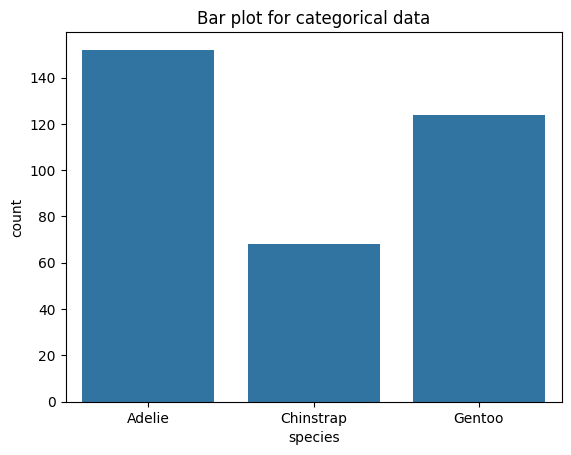

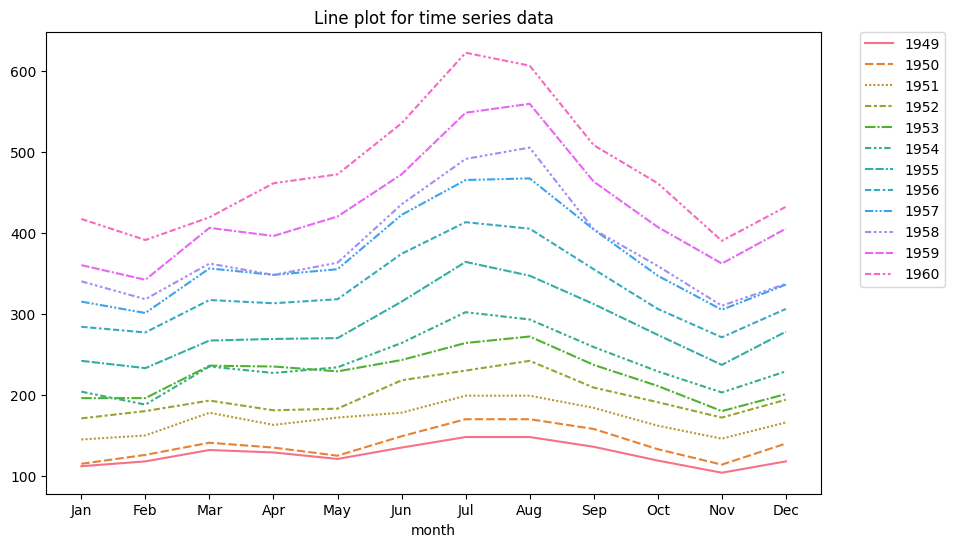

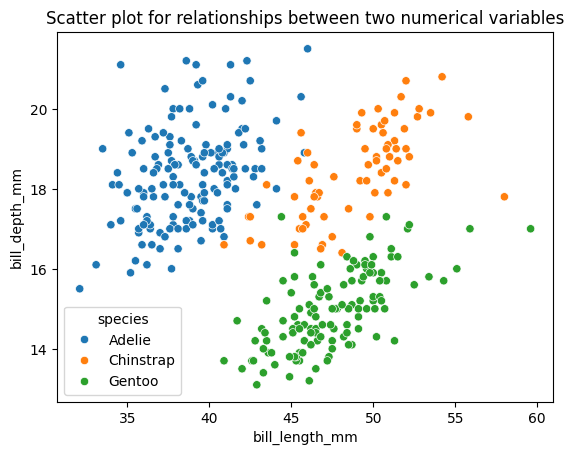

In [3]:
# Load the penguins and flight datasets
penguins = sns.load_dataset('penguins')
# Load the flights dataset
flights = sns.load_dataset('flights')

# Pivot the dataset to get the number of passengers by month and year
flights_pivot = flights.pivot_table(values="passengers", index="month", columns="year")

# bar plots are useful when there are many groups to show (like 30 species)
# Bar plot for categorical data
sns.countplot(x='species', data=penguins)
plt.title('Bar plot for categorical data')
plt.show()

# Line plot for time series data

# Line plot for time series data
plt.figure(figsize=(10,6))
sns.lineplot(data=flights_pivot)

# move legend outside the axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Line plot for time series data')
plt.show()

# Scatter plot for relationships between two numerical variables
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Scatter plot for relationships between two numerical variables')
plt.show()

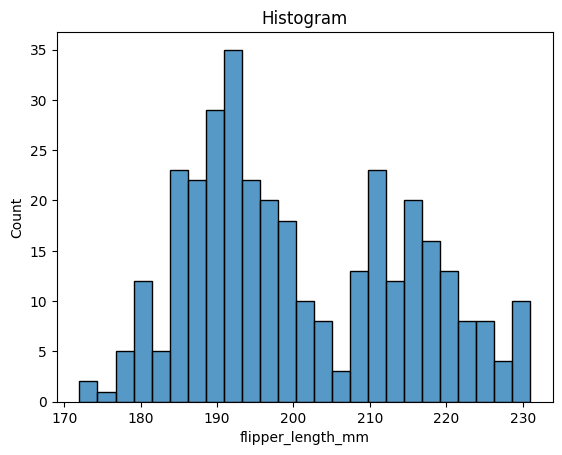

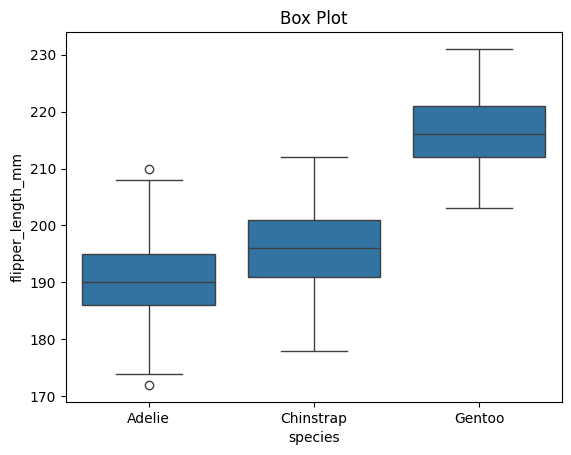

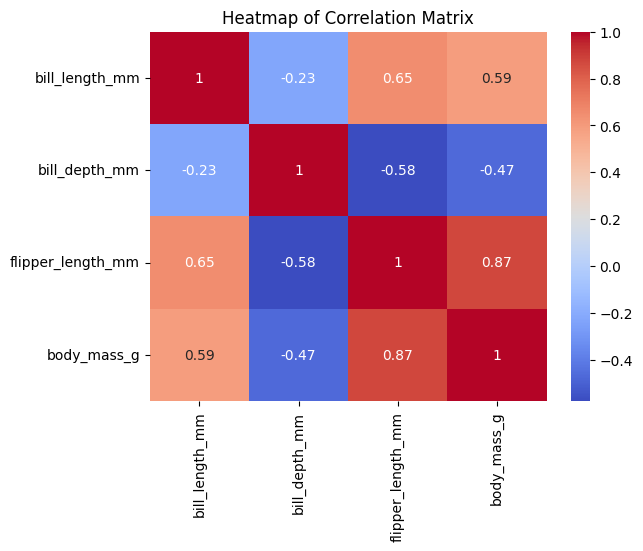

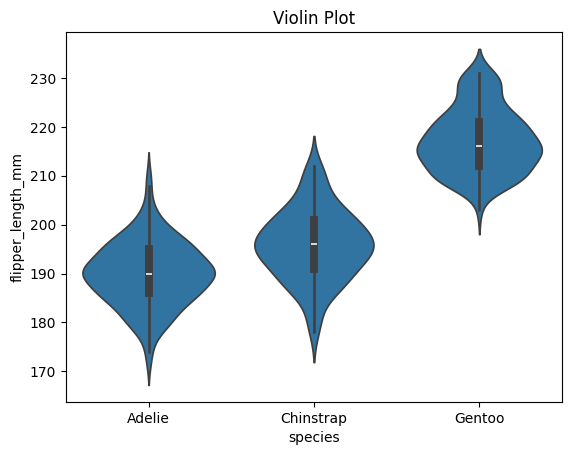

In [4]:
# Histogram
# layer of interpretation: # of bins 
sns.histplot(data=penguins, x="flipper_length_mm", bins=25)
plt.title('Histogram')
plt.show()

# Box Plot
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)
plt.title('Box Plot')
plt.show()

# Heatmap
# First, we'll create a correlation matrix
penguins_dropna = penguins.dropna()
penguins_numeric = penguins_dropna.loc[:,["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
corr = penguins_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Violin Plot
sns.violinplot(x="species", y="flipper_length_mm", data=penguins)
plt.title('Violin Plot')
plt.show()

## White space / data sensity

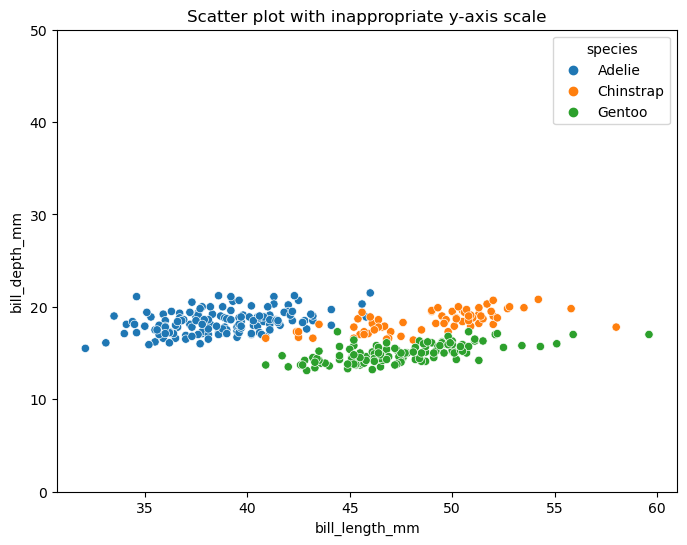

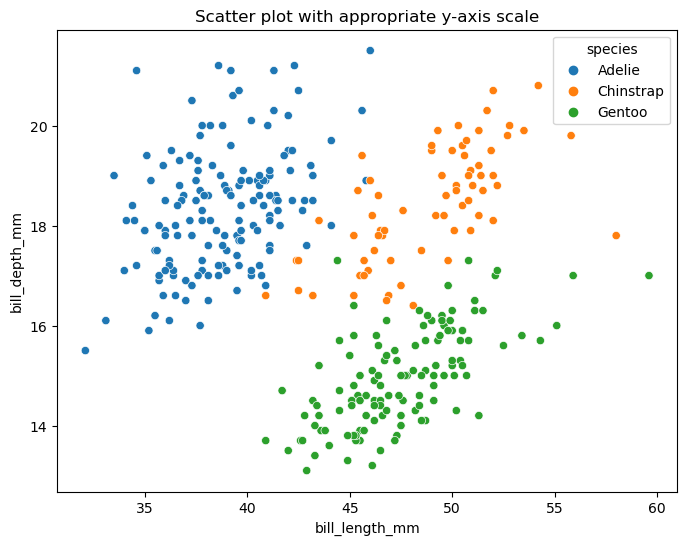

In [21]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Scatter plot with inappropriate y-axis scale
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.ylim(0, 50)
plt.title('Scatter plot with inappropriate y-axis scale')
plt.show()

# Scatter plot with appropriate y-axis scale
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title('Scatter plot with appropriate y-axis scale')
plt.show()

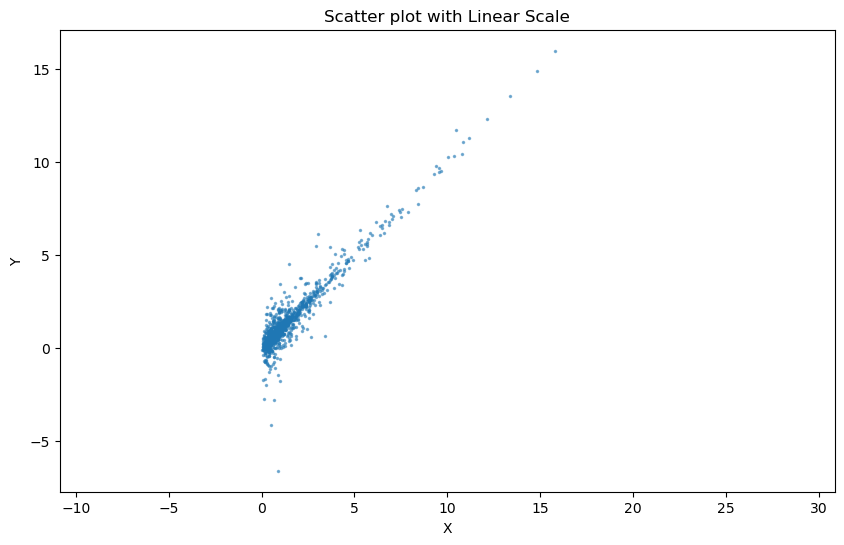

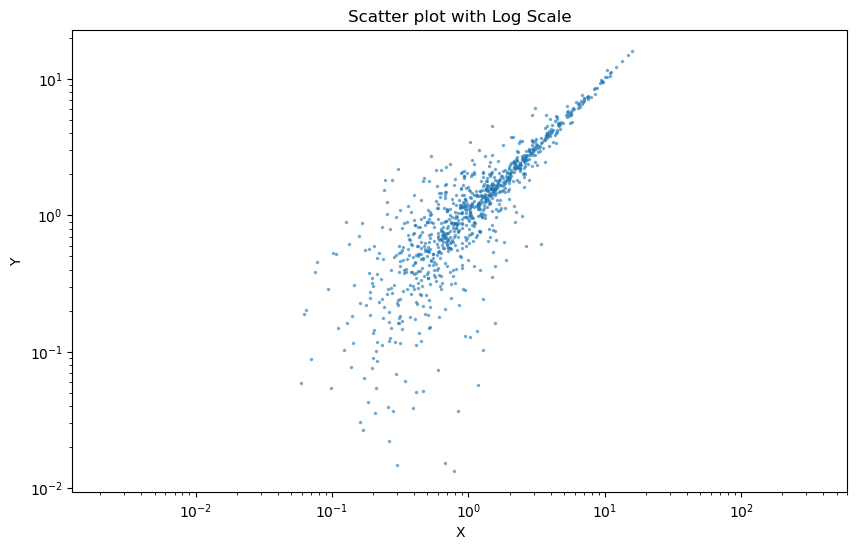

In [72]:
# Create synthetic x and y data from an exponential distribution with some noise
np.random.seed(0)
x = np.random.lognormal(mean=0, sigma=1, size=1000)
y = x + (np.random.rand(1000)-0.5) * np.random.lognormal(mean=0, sigma=1, size=1000)

# Scatter plot with linear scale
plt.figure(figsize=(10, 6))
plt.plot(x, y,'.',markersize=3,alpha=0.5)
plt.title('Scatter plot with Linear Scale')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.xlim((0,20))
plt.show()

# Scatter plot with log scale
plt.figure(figsize=(10, 6))
plt.plot(x, y,'.',markersize=3,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot with Log Scale')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

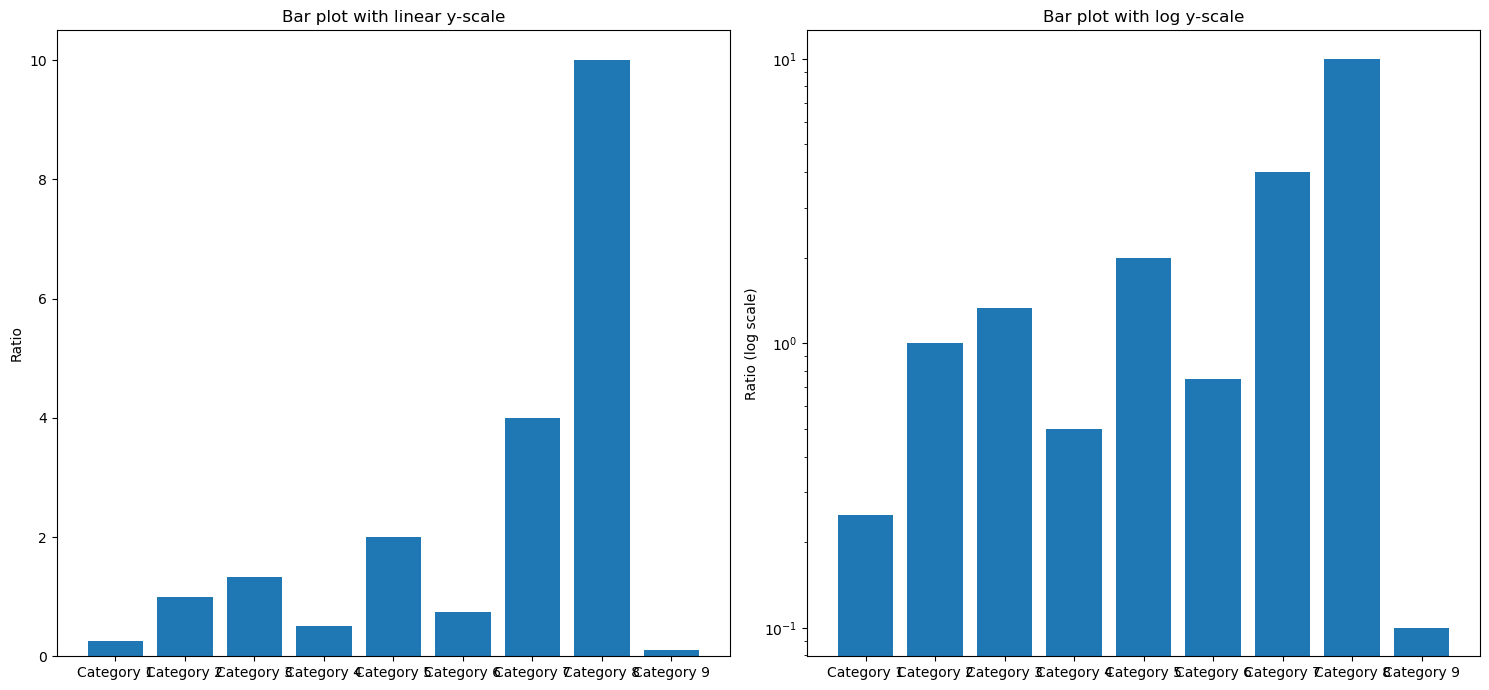

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
categories = ['Category {}'.format(i+1) for i in range(9)]
values = np.random.permutation([0.1,0.25,0.5,0.75,1,1.3333,2,4,10])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Bar plot with linear y-scale
axs[0].bar(categories, values)
axs[0].set_title('Bar plot with linear y-scale')
axs[0].set_ylabel('Ratio')

# Bar plot with log y-scale
axs[1].bar(categories, values)
axs[1].set_yscale('log')
axs[1].set_title('Bar plot with log y-scale')
axs[1].set_ylabel('Ratio (log scale)')

plt.tight_layout()
plt.show()

## Now for some plots types you should NOT use

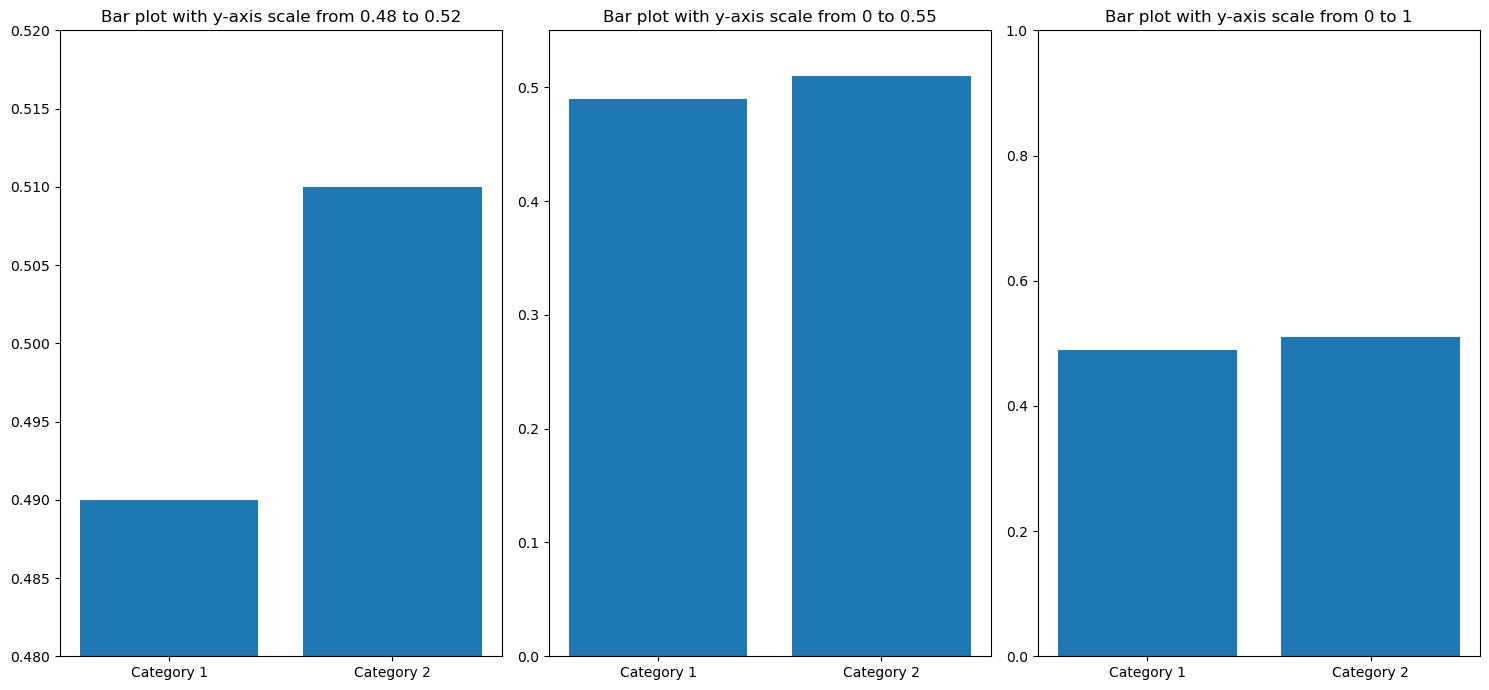

In [37]:
import matplotlib.pyplot as plt

# Data
categories = ['Category 1', 'Category 2']
values = [0.49, 0.51]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Plot with y-axis scale from 0 to 0.55
axs[1].bar(categories, values)
axs[1].set_ylim(0, 0.55)
axs[1].set_title('Bar plot with y-axis scale from 0 to 0.55')

# Plot with y-axis scale from 0 to 1
axs[2].bar(categories, values)
axs[2].set_ylim(0, 1)
axs[2].set_title('Bar plot with y-axis scale from 0 to 1')

# Plot with y-axis scale from 0.48 to 0.52
axs[0].bar(categories, values)
axs[0].set_ylim(0.48, 0.52)
axs[0].set_title('Bar plot with y-axis scale from 0.48 to 0.52')

plt.tight_layout()
plt.show()

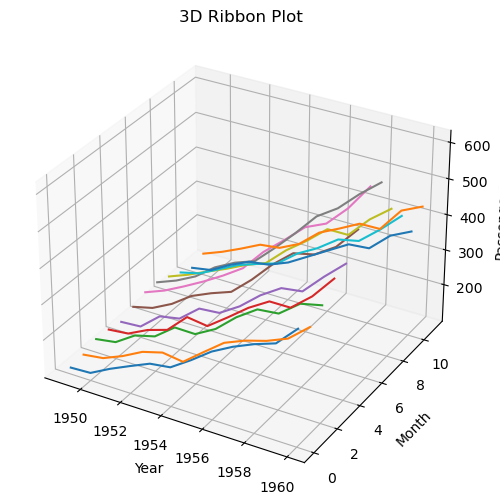

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the flights dataset
flights = sns.load_dataset('flights')

# Pivot the dataset to get the number of passengers by month and year
flights_pivot = flights.pivot_table(values="passengers", index="month", columns="year")

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D line plot for each month
for i, month in enumerate(flights_pivot.index):
    ax.plot(flights_pivot.columns, flights_pivot.loc[month], zs=i, zdir='y')

# Set the labels
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_zlabel('Passengers')
ax.set_title('3D Ribbon Plot')

plt.show()

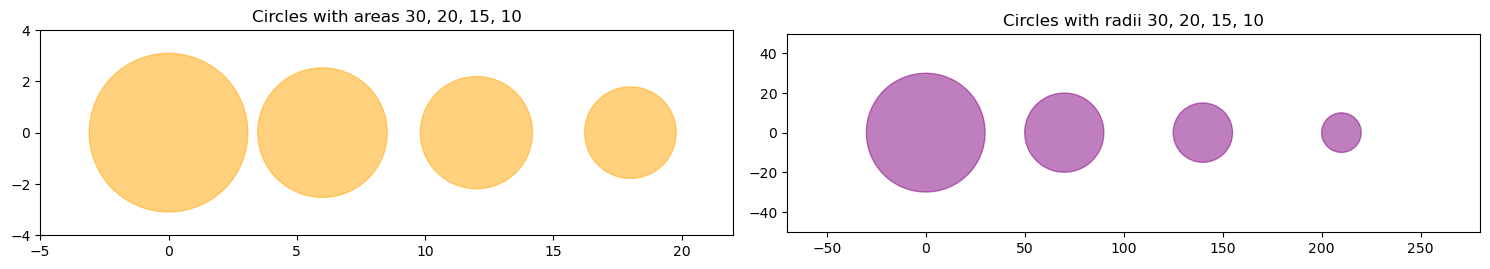

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot circles with given areas
areas = [30, 20, 15, 10]
for i, area in enumerate(areas):
    axs[0].add_patch(plt.Circle((i*6, 0), np.sqrt(area/np.pi), fill=True, color='orange', alpha=0.5))
axs[0].set_aspect('equal', 'box')
axs[0].set_xlim(-5, 22)
axs[0].set_ylim(-4, 4)
axs[0].set_title('Circles with areas 30, 20, 15, 10')

# Plot circles with given radii
radii = [30, 20, 15, 10]
for i, radius in enumerate(radii):
    axs[1].add_patch(plt.Circle((i*70, 0), radius, fill=True, color='purple', alpha=0.5))
axs[1].set_aspect('equal', 'box')
axs[1].set_xlim(-70, 280)
axs[1].set_ylim(-50, 50)
axs[1].set_title('Circles with radii 30, 20, 15, 10')

plt.tight_layout()
plt.show()

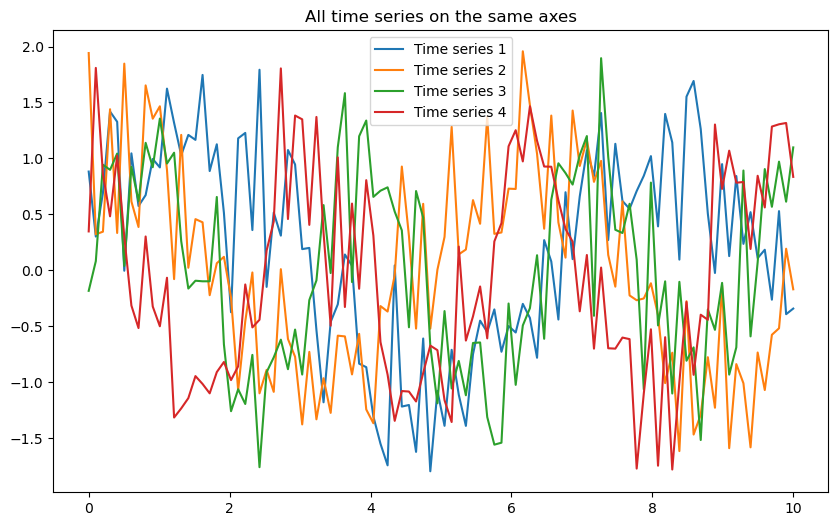

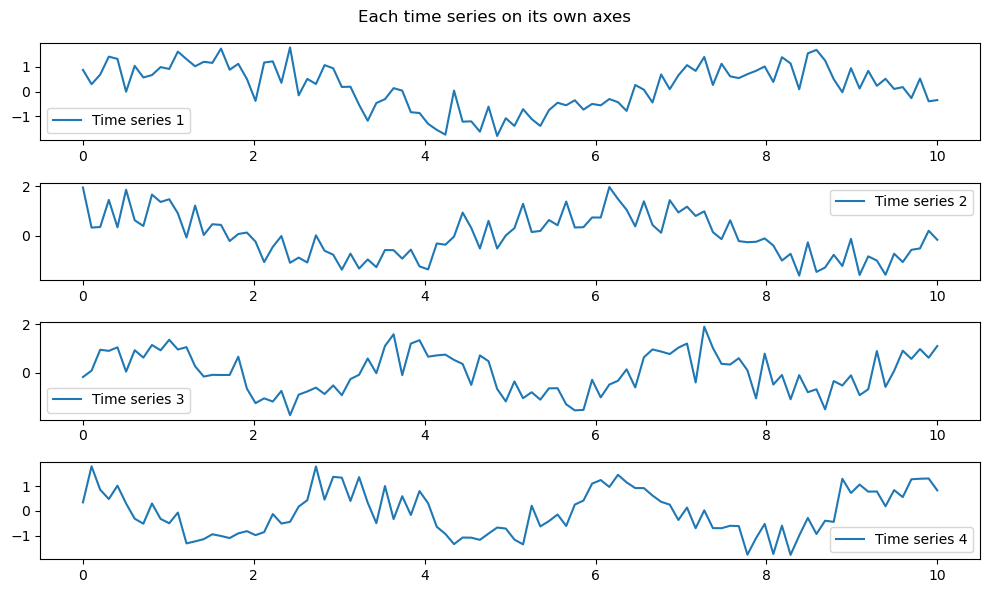

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y1 = np.sin(x) + np.random.normal(0, 0.5, size=100)
y2 = np.cos(x) + np.random.normal(0, 0.5, size=100)
y3 = np.sin(2*x) + np.random.normal(0, 0.5, size=100)
y4 = np.cos(2*x) + np.random.normal(0, 0.5, size=100)

# Plot all time series on the same axes
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Time series 1')
plt.plot(x, y2, label='Time series 2')
plt.plot(x, y3, label='Time series 3')
plt.plot(x, y4, label='Time series 4')
plt.legend()
plt.title('All time series on the same axes')
plt.show()

# Plot each time series on its own axes
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(4, 1)

ax1 = plt.subplot(gs[0, 0])
ax1.plot(x, y1, label='Time series 1')
ax1.legend()

ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax2.plot(x, y2, label='Time series 2')
ax2.legend()

ax3 = plt.subplot(gs[2, 0], sharex=ax1)
ax3.plot(x, y3, label='Time series 3')
ax3.legend()

ax4 = plt.subplot(gs[3, 0], sharex=ax1)
ax4.plot(x, y4, label='Time series 4')
ax4.legend()

plt.suptitle('Each time series on its own axes')
plt.tight_layout()
plt.show()

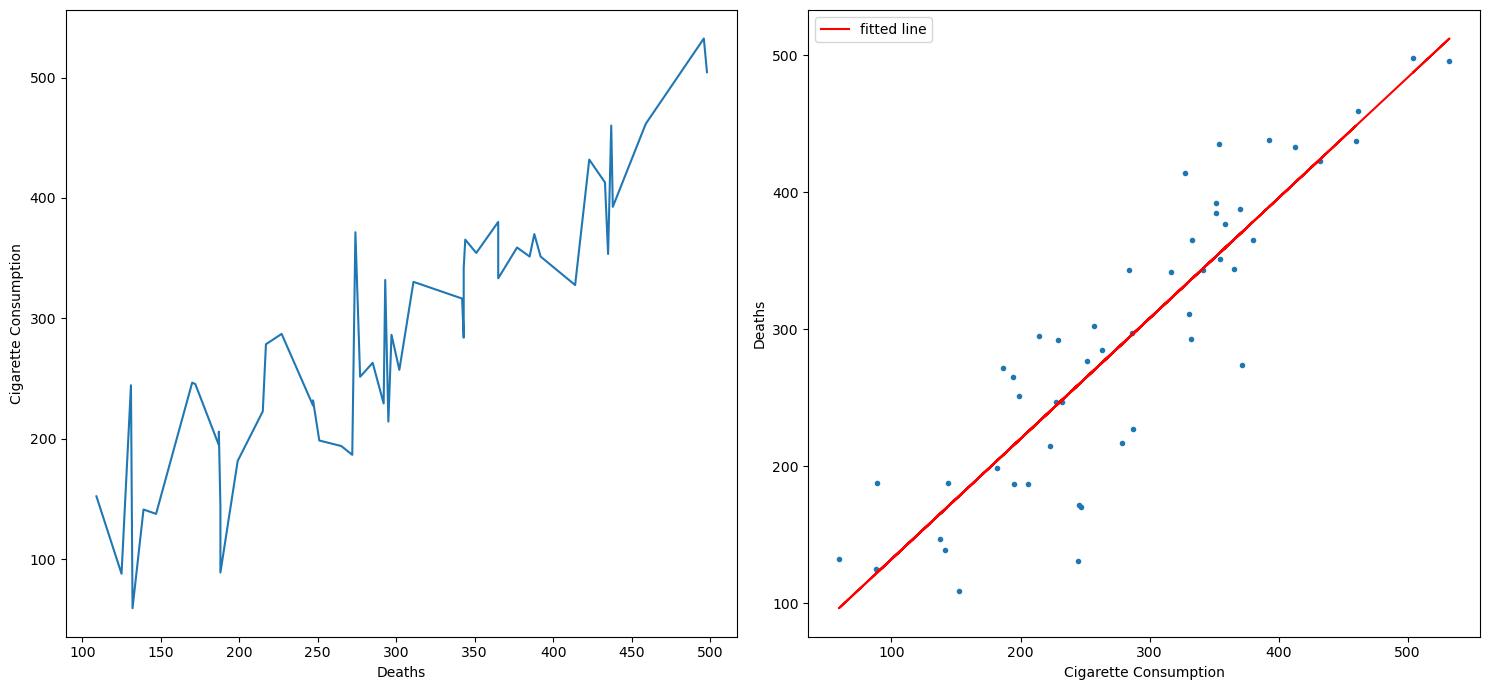

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(0)
deaths = np.sort(np.random.randint(100, 500, size=50))
cigarette_consumption = deaths + np.random.normal(0, 50, size=50)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Scatter plot with line
axs[0].plot(deaths, cigarette_consumption)
axs[0].set_xlabel('Deaths')
axs[0].set_ylabel('Cigarette Consumption')

# Scatter plot without line
axs[1].plot(cigarette_consumption,deaths,'.')
axs[1].set_ylabel('Deaths')
axs[1].set_xlabel('Cigarette Consumption')
# add interpretation
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(cigarette_consumption, deaths)
axs[1].plot(cigarette_consumption, intercept + slope * cigarette_consumption, 'r', label='fitted line')
axs[1].legend()

plt.tight_layout()
plt.show()

In [12]:
#showing how meshgrid works (useful for 2D plots)
x=np.array([1,2,3])
y=np.array([1,2,3])
print(f'x={x}')
print(f'y={y}')
X,Y=np.meshgrid(x,y)
print(f'X={X}')

x=[1 2 3]
y=[1 2 3]
X=[array([1, 2, 3])]


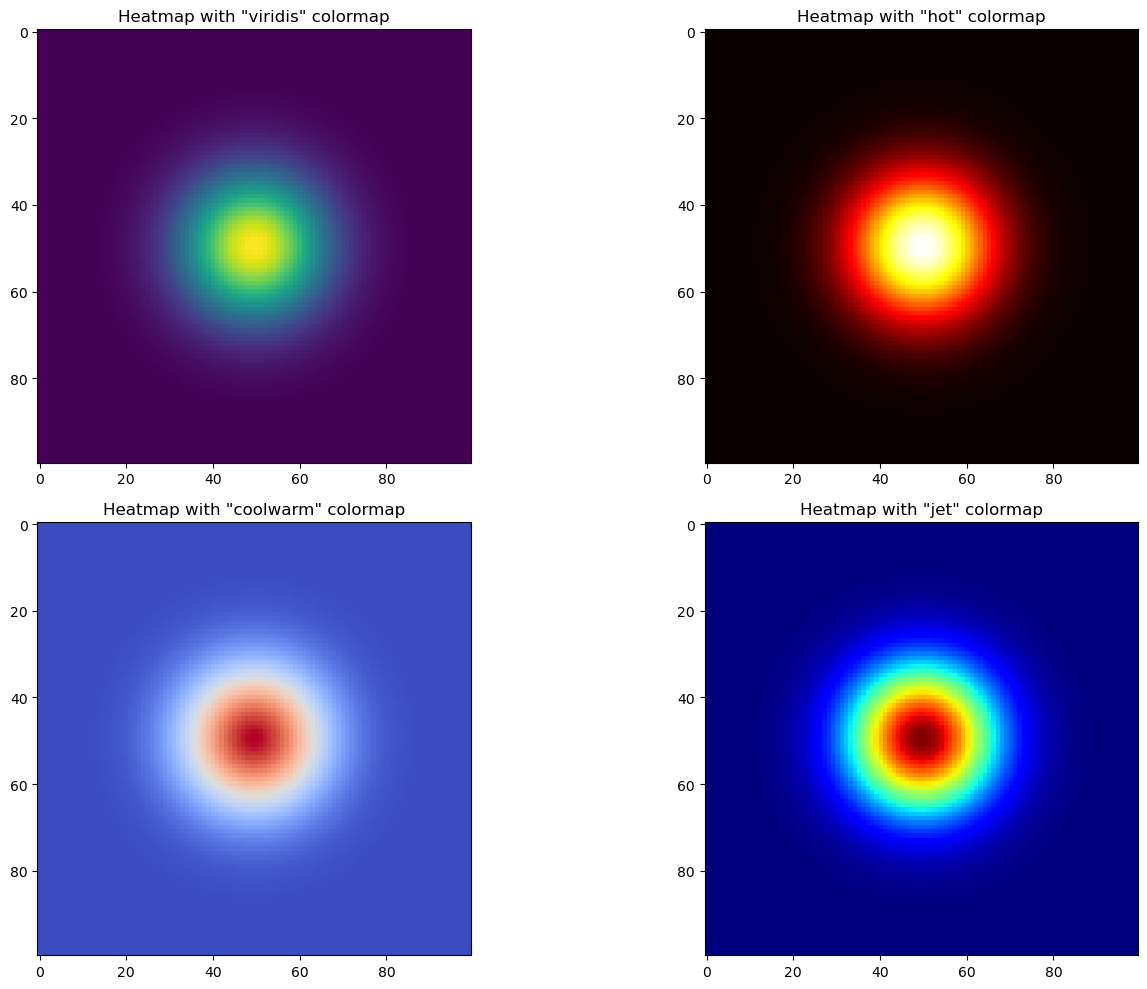

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D Gaussian distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y) #meshgrid takes 2 1D vectors and creats 2D vectors
Z = np.exp(-(X**2 + Y**2))

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Heatmap with 'viridis' colormap
axs[0, 0].imshow(Z, cmap='viridis')
axs[0, 0].set_title('Heatmap with "viridis" colormap')

# Heatmap with 'hot' colormap
axs[0, 1].imshow(Z, cmap='hot')
axs[0, 1].set_title('Heatmap with "hot" colormap')

# Heatmap with 'coolwarm' colormap
axs[1, 0].imshow(Z, cmap='coolwarm')
axs[1, 0].set_title('Heatmap with "coolwarm" colormap')

# Heatmap with 'jet' colormap
axs[1, 1].imshow(Z, cmap='jet')
axs[1, 1].set_title('Heatmap with "jet" colormap')

plt.tight_layout()
plt.show()

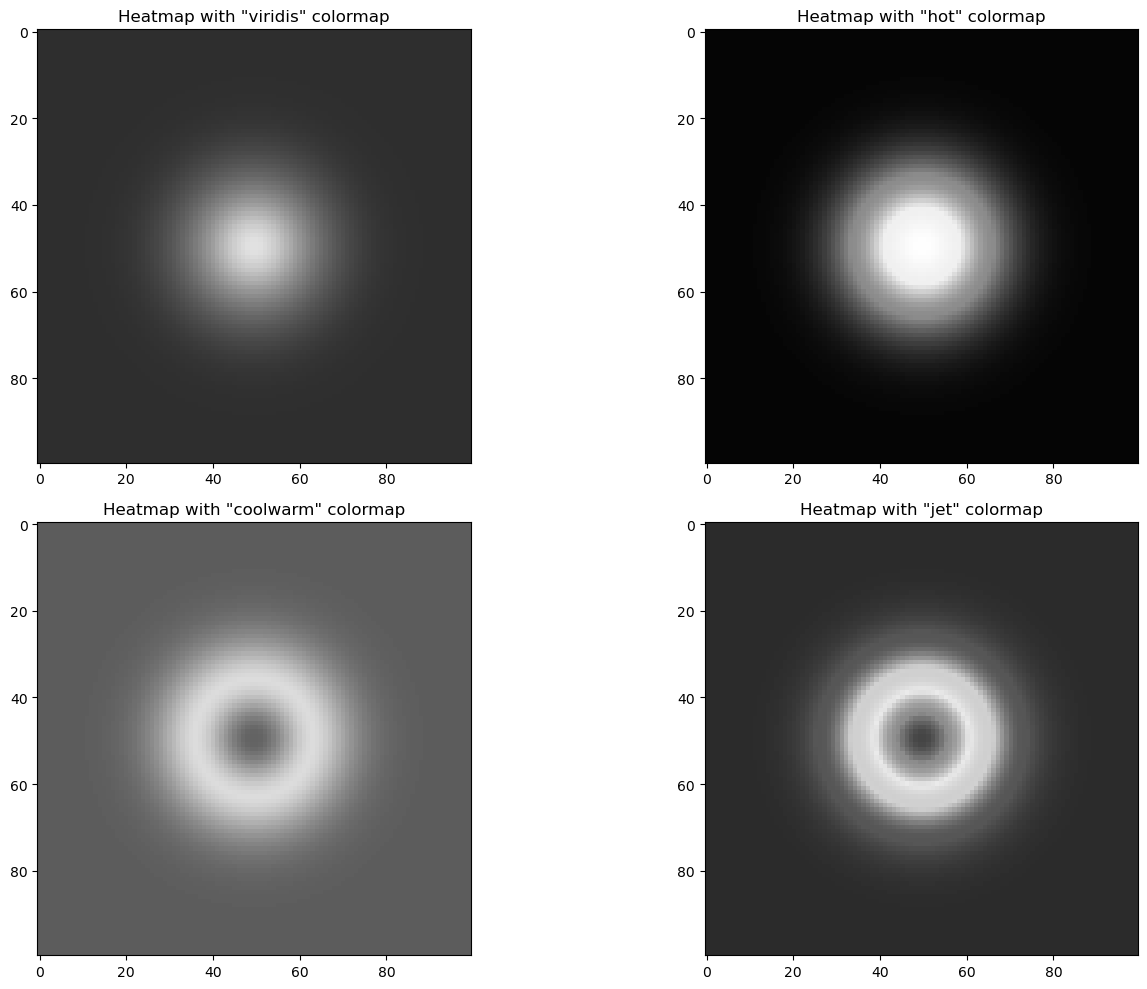

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a 2D Gaussian distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

# Define a function to convert a colormap to grayscale
def to_grayscale(cmap):
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA colors to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return mcolors.LinearSegmentedColormap.from_list(cmap.name + "_grayscale", colors, cmap.N)

# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Heatmap with 'viridis' colormap
axs[0, 0].imshow(Z, cmap=to_grayscale('viridis'))
axs[0, 0].set_title('Heatmap with "viridis" colormap')

# Heatmap with 'hot' colormap
axs[0, 1].imshow(Z, cmap=to_grayscale('hot'))
axs[0, 1].set_title('Heatmap with "hot" colormap')

# Heatmap with 'coolwarm' colormap
axs[1, 0].imshow(Z, cmap=to_grayscale('coolwarm'))
axs[1, 0].set_title('Heatmap with "coolwarm" colormap')

# Heatmap with 'jet' colormap
axs[1, 1].imshow(Z, cmap=to_grayscale('jet'))
axs[1, 1].set_title('Heatmap with "jet" colormap')

plt.tight_layout()
plt.show()

/var/folders/99/56hx10n97n33s3crjk9c0t600000gn/T/ipykernel_29269/3861740898.py:21: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  z = kde.gaussian_kde(xy)(xy)


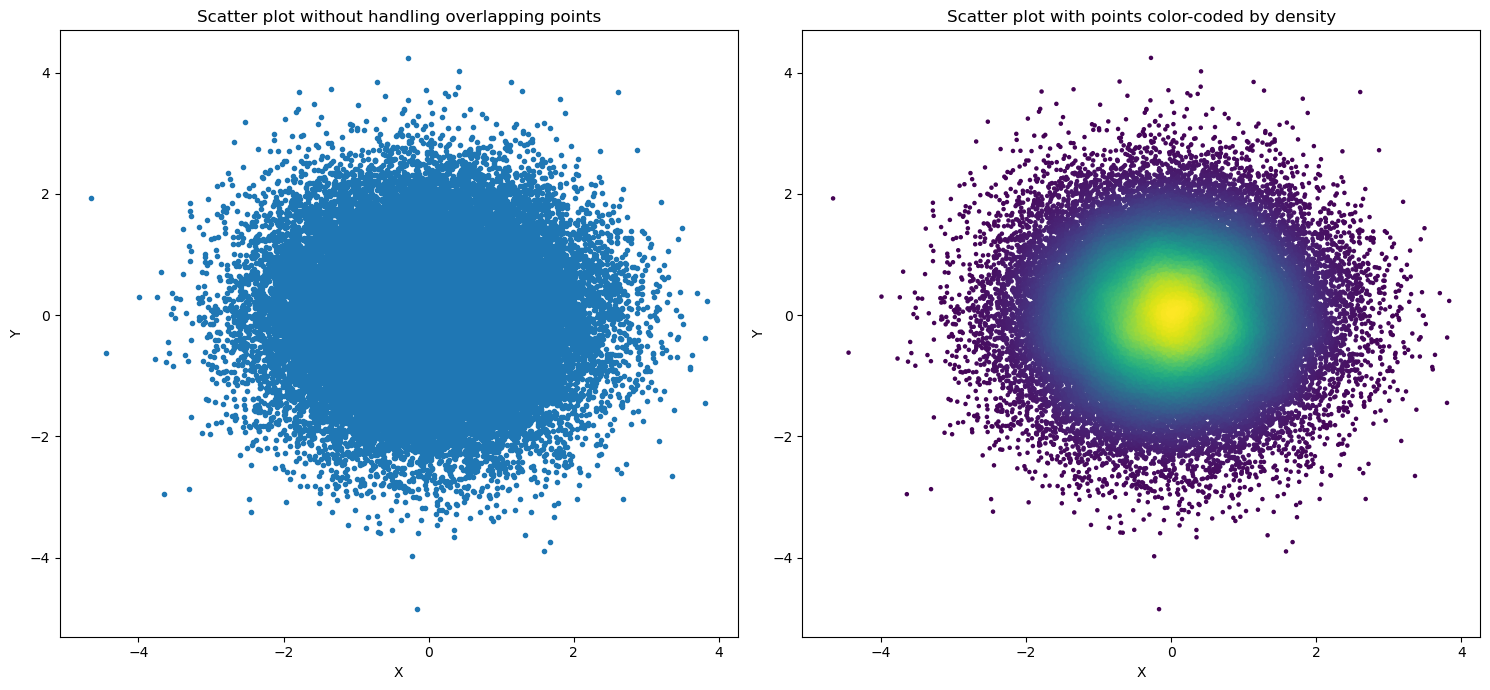

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Create synthetic data
np.random.seed(0)
x = np.random.normal(size=50000)
y = np.random.normal(size=50000)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Scatter plot without handling overlapping points
axs[0].plot(x, y,'.')
axs[0].set_title('Scatter plot without handling overlapping points')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Scatter plot with points color-coded by density
xy = np.vstack([x,y])
z = kde.gaussian_kde(xy)(xy)
axs[1].scatter(x, y, c=z, s=5)
axs[1].set_title('Scatter plot with points color-coded by density')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
filename = '../Datasets/StudentsPerformance.csv'
df = pd.read_csv(filename)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


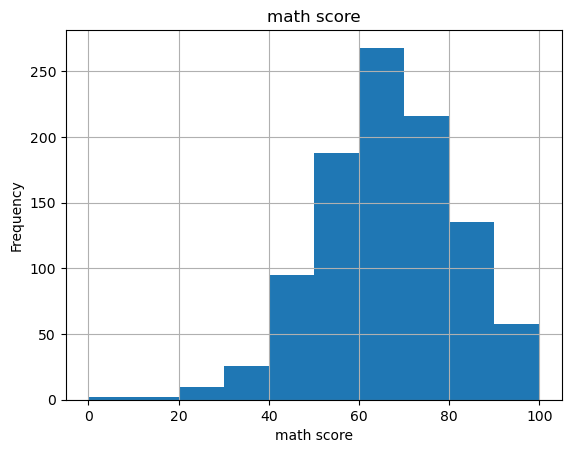

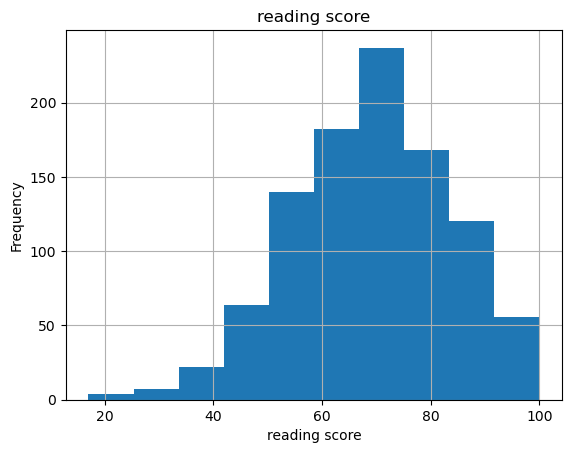

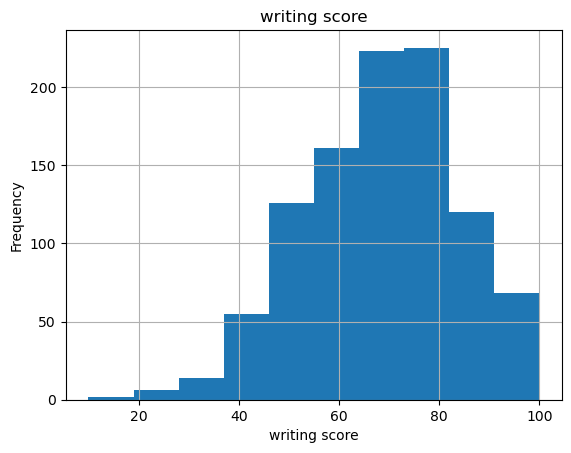

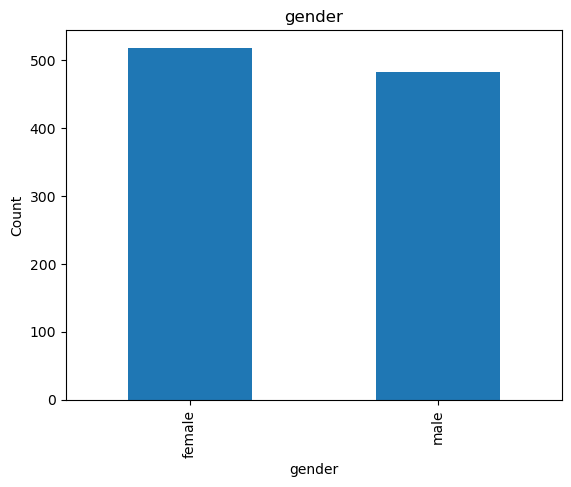

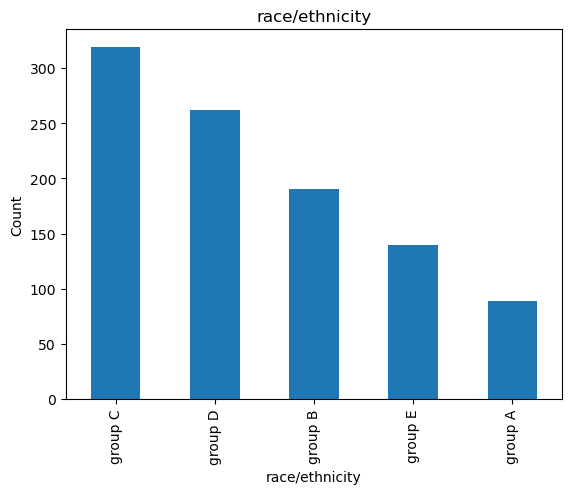

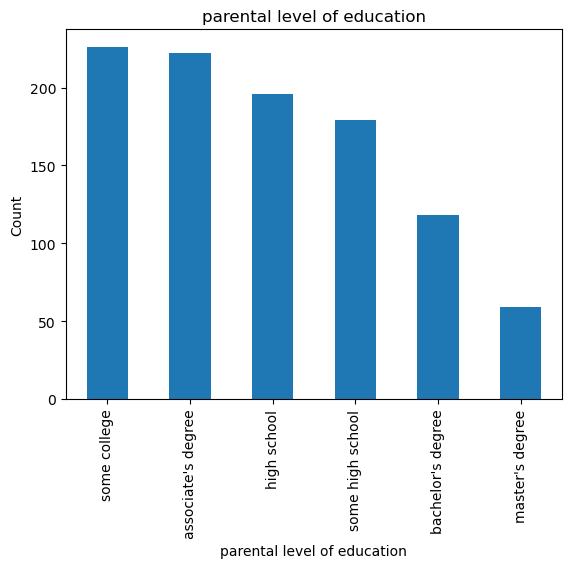

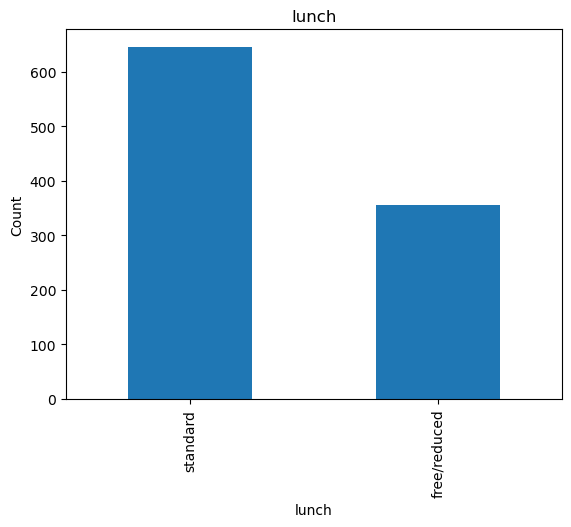

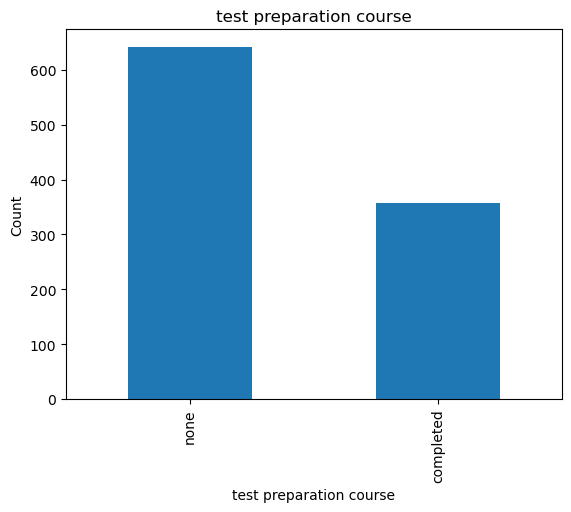

In [17]:
# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Histograms for numerical columns
df['math score'].hist()
plt.title('math score')
plt.xlabel('math score')
plt.ylabel('Frequency')
plt.show()

df['reading score'].hist()
plt.title('reading score')
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.show()

df['writing score'].hist()
plt.title('writing score')
plt.xlabel('writing score')
plt.ylabel('Frequency')
plt.show()

# Bar plots for categorical columns
df['gender'].value_counts().plot(kind='bar')
plt.title('gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

df['race/ethnicity'].value_counts().plot(kind='bar')
plt.title('race/ethnicity')
plt.xlabel('race/ethnicity')
plt.ylabel('Count')
plt.show()

df['parental level of education'].value_counts().plot(kind='bar')
plt.title('parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Count')
plt.show()

df['lunch'].value_counts().plot(kind='bar')
plt.title('lunch')
plt.xlabel('lunch')
plt.ylabel('Count')
plt.show()

df['test preparation course'].value_counts().plot(kind='bar')
plt.title('test preparation course')
plt.xlabel('test preparation course')
plt.ylabel('Count')
plt.show()

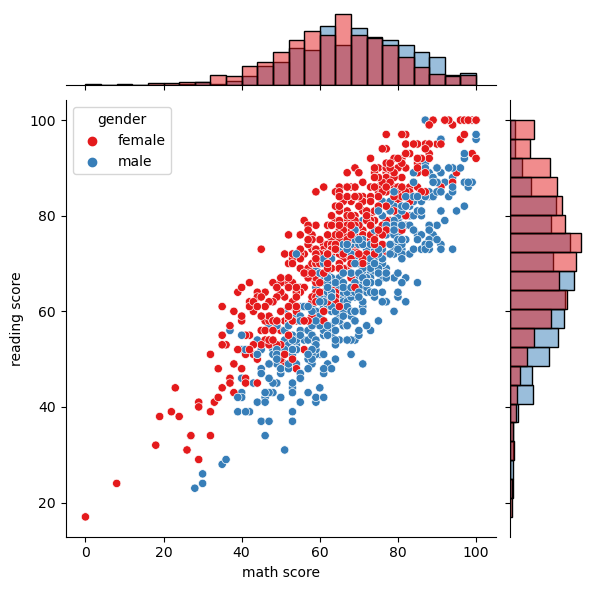

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create marginal distribution that show two histogram each, one for male and one for female
g = sns.JointGrid(data=df, x='math score', y='reading score', hue='gender',palette='Set1')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.histplot)
plt.show()


/Users/rwollman/opt/miniconda3/envs/chem269/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


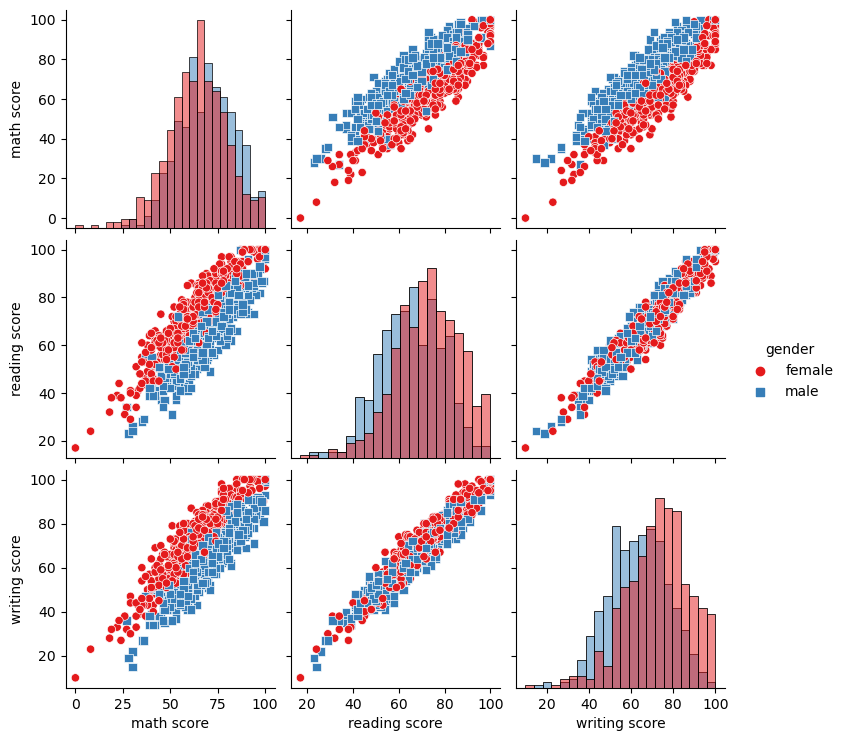

In [22]:
import seaborn as sns

# Select only the numerical columns and 'gender' and 'lunch' columns from the dataframe
selected_columns = df[['math score', 'reading score', 'writing score', 'gender', 'lunch']]

# Create a pairplot for the selected columns, color by 'gender' and use different markers for 'lunch'
sns.pairplot(selected_columns, hue='gender', markers=['o', 's'], palette='Set1', diag_kind='hist')
plt.show()

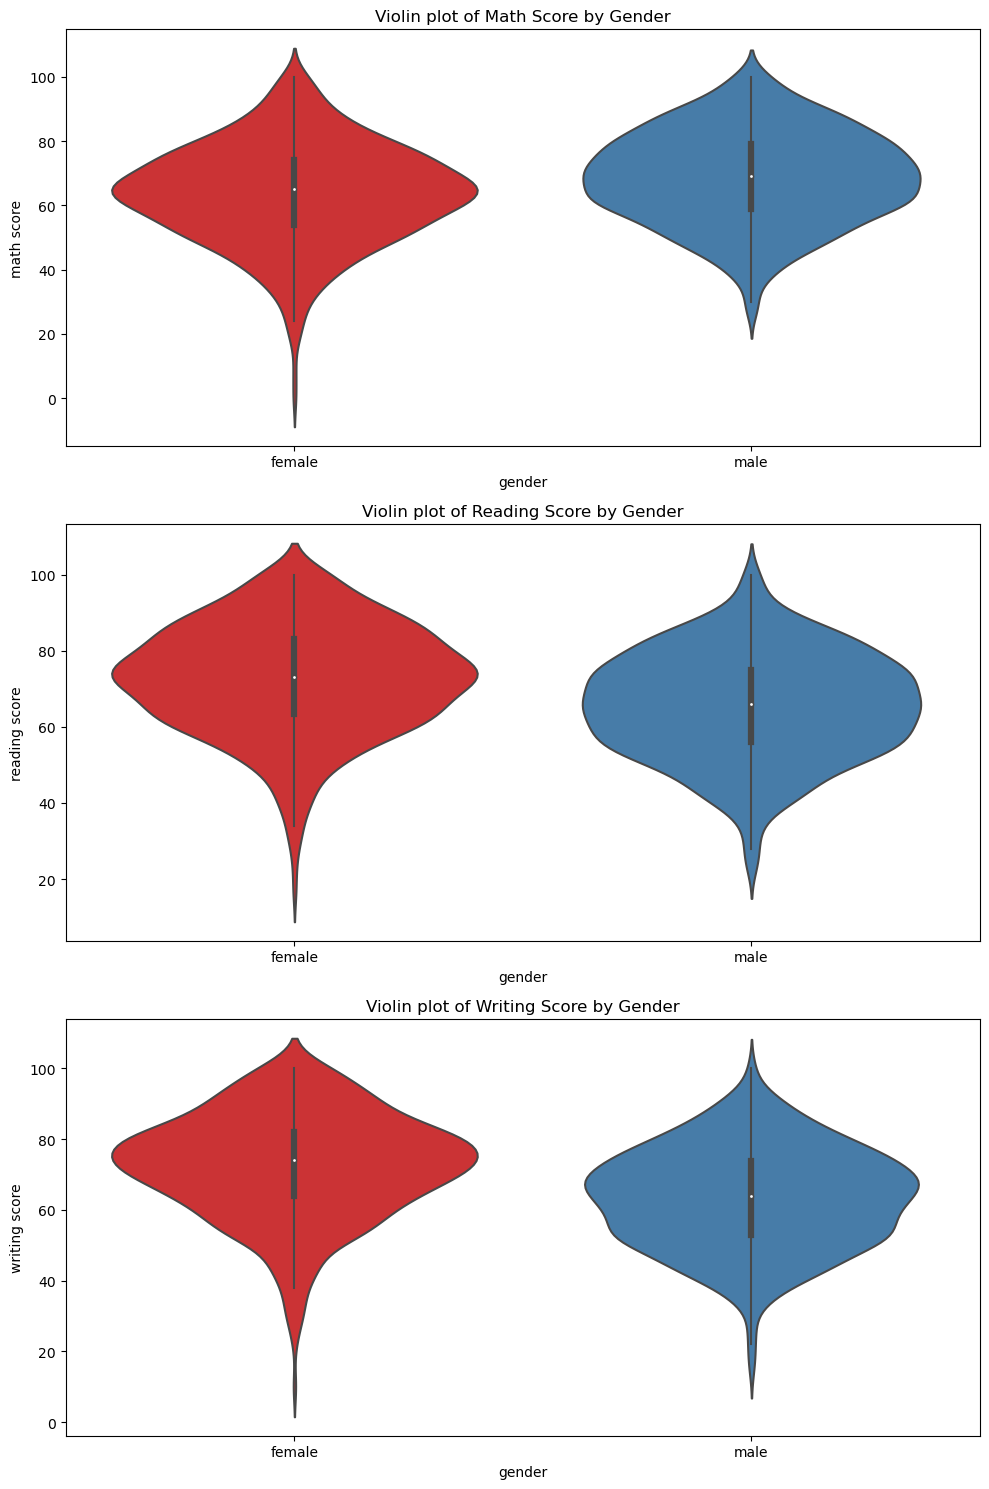

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots, one for each score
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Create violin plots for the numerical columns, split by 'gender'
sns.violinplot(ax=axs[0], data=df, x='gender', y='math score', palette='Set1')
axs[0].set_title('Violin plot of Math Score by Gender')

sns.violinplot(ax=axs[1], data=df, x='gender', y='reading score', palette='Set1')
axs[1].set_title('Violin plot of Reading Score by Gender')

sns.violinplot(ax=axs[2], data=df, x='gender', y='writing score', palette='Set1')
axs[2].set_title('Violin plot of Writing Score by Gender')

# Adjust the layout to make sure everything fits
plt.tight_layout()
plt.show()

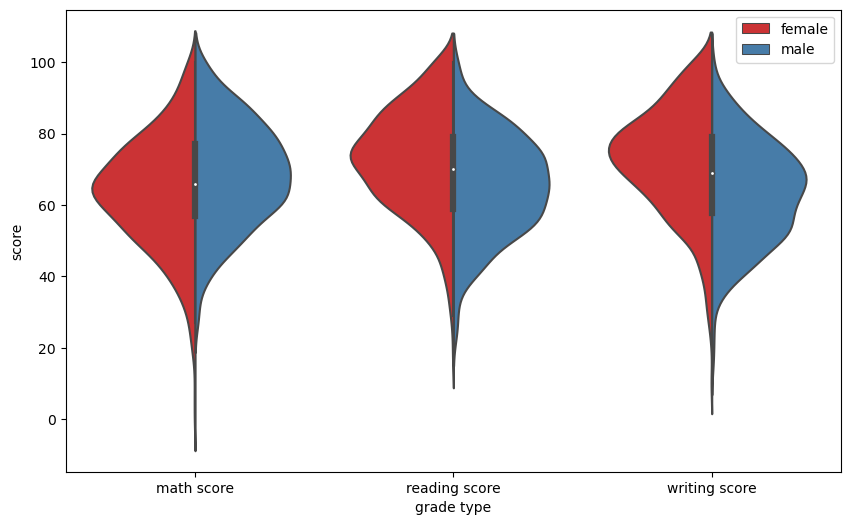

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a "long" version of the data
df_long = pd.melt(df, id_vars=['gender'], value_vars=['math score', 'reading score', 'writing score'], 
                  var_name='grade type', value_name='score')

# Create split violin plots without facets
plt.figure(figsize=(10, 6))
sns.violinplot(x='grade type', y='score', hue='gender', data=df_long, split=True, palette='Set1')
plt.legend(loc='upper right')
plt.show()
